In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [63]:
df = pd.read_csv('regression2.csv',index_col=0)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 04/07/2018 to 05/12/2018
Data columns (total 7 columns):
Organic Search           155 non-null int64
CRM                      155 non-null int64
Paid Search Brand        155 non-null int64
Direct                   155 non-null int64
Paid Search Non Brand    155 non-null int64
Affiliate                155 non-null int64
Sales                    155 non-null int64
dtypes: int64(7)
memory usage: 9.7+ KB


In [65]:
X = df.drop('Sales',axis=1)

In [66]:
y = df['Sales']

In [67]:
from sklearn.cross_validation import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
df.corr()

,Organic Search,CRM,Paid Search Brand,Direct,Paid Search Non Brand,Affiliate,Sales
Organic Search,1.000000,0.760566,0.945944,0.959490,0.879696,0.928857,0.971963
CRM,0.760566,1.000000,0.764856,0.799125,0.612309,0.760573,0.839988
Paid Search Brand,0.945944,0.764856,1.000000,0.952478,0.899092,0.934482,0.978046
Direct,0.959490,0.799125,0.952478,1.000000,0.843998,0.935933,0.972251
Paid Search Non Brand,0.879696,0.612309,0.899092,0.843998,1.000000,0.892117,0.907643
Affiliate,0.928857,0.760573,0.934482,0.935933,0.892117,1.000000,0.956552
Sales,0.971963,0.839988,0.978046,0.972251,0.907643,0.956552,1.000000


Fitting a simple linear regression model first#

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
pd.DataFrame(lm.coef_, X.columns)

,0
Organic Search,1.005797
CRM,1.014008
Paid Search Brand,1.222584
Direct,1.195946
Paid Search Non Brand,1.561424
Affiliate,0.493654


In [75]:
predictions = lm.predict(X_test)

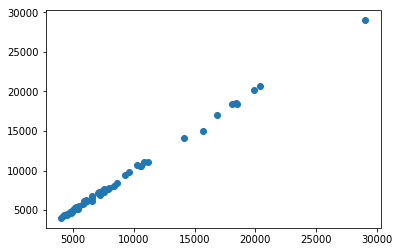

In [76]:
plt.scatter(y_test,predictions)

In [104]:
from sklearn import metrics

In [105]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  147.0315201718888
MSE:  39892.79584938487
RMSE:  199.73180980851515


In [106]:
metrics.explained_variance_score(y_test,predictions)

0.9985605111869159

C:\Users\felix.therrien\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


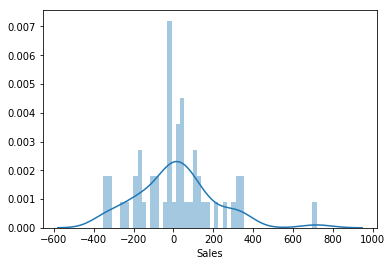

In [107]:
sns.distplot((y_test-predictions),bins=50)

In [81]:
import statsmodels.api as sm

In [95]:
ols_model = sm.OLS(y_train, X_train).fit()

In [96]:
ols_preds = ols_model.predict(X_test)

In [97]:
ols_summary = ols_model.summary()
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.006e+04
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          8.84e-171
Time:                        11:25:41   Log-Likelihood:                -678.60
No. Observations:                 103   AIC:                             1369.
Df Residuals:                      97   BIC:                             1385.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Organic Search            0.84

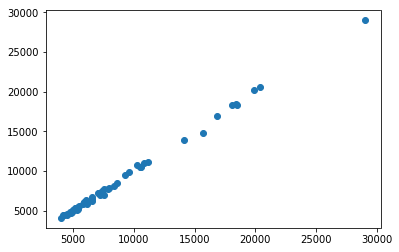

In [103]:
plt.scatter(y_test,ols_preds)

In [98]:
from sklearn.linear_model import Lasso

In [121]:
lasso = Lasso(alpha=0.3)

In [122]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
lasso_preds = lasso.predict(X_test)

In [124]:
pd.DataFrame(lasso.coef_, X.columns)

,0
Organic Search,1.005805
CRM,1.014008
Paid Search Brand,1.222584
Direct,1.195932
Paid Search Non Brand,1.561422
Affiliate,0.493656


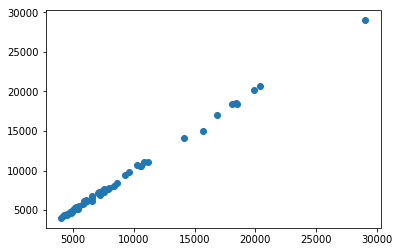

In [92]:
plt.scatter(y_test,lasso_preds)